<a href="https://colab.research.google.com/github/AlexTako/AI_practice/blob/main/AI%20handwritten%20translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя датасет по рукописным буквам английского языка, обучил модель, оценил ее предсказательные способности. Использовал только полносвязанные слои. Поэкспериментировал с числом слоев и числом нейронов в слое, добился максимальной точности. Нарисовал графики точности и потерь для обучающей и тестовой выборки, сделал по ним выводы.

In [ ]:
import numpy as np
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

In [ ]:
X = dataset[:, 1:]
Y = dataset[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.3)

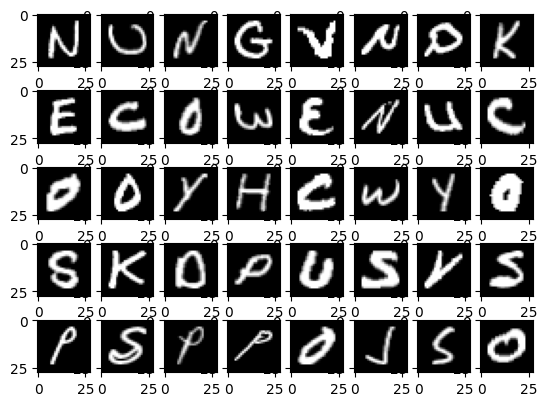

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(40):

    x = x_train[i]
    x = x.reshape((28, 28))
    im = plt.subplot(5, 8, i+1)
    im.imshow(x, cmap='gray')

In [ ]:
# Ваше решение
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(28, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [ ]:
x_train.shape

(260715, 784)

In [ ]:
x_test.shape

(111736, 784)

In [ ]:
# изменение формы тензора
x_train = x_train.reshape((260715, 784))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
x_train = x_train.astype('float32') / 255

# изменение формы тензора
x_test = x_test.reshape((111736, 784))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
x_test = x_test.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 28) # Кодируем обучающие метки на 28 классов
y_test = to_categorical(y_test, 28)   # Кодируем тестовые метки на 28 классов

In [ ]:
y_train.shape

(260715, 28)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
2037/2037 [==============================] - 10s 4ms/step - loss: 0.2745 - accuracy: 0.9252 - val_loss: 0.1325 - val_accuracy: 0.9634
Epoch 2/5
2037/2037 [==============================] - 8s 4ms/step - loss: 0.1060 - accuracy: 0.9707 - val_loss: 0.1030 - val_accuracy: 0.9710
Epoch 3/5
2037/2037 [==============================] - 9s 4ms/step - loss: 0.0761 - accuracy: 0.9789 - val_loss: 0.0816 - val_accuracy: 0.9782
Epoch 4/5
2037/2037 [==============================] - 8s 4ms/step - loss: 0.0585 - accuracy: 0.9838 - val_loss: 0.0803 - val_accuracy: 0.9787
Epoch 5/5
2037/2037 [==============================] - 9s 4ms/step - loss: 0.0468 - accuracy: 0.9873 - val_loss: 0.0745 - val_accuracy: 0.9805


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точность на тестовом образцу:', test_acc)
print('Потери на тестовом образце:', test_loss)

3492/3492 [==============================] - 8s 2ms/step - loss: 0.0745 - accuracy: 0.9805
Точность на тестовом образцу: 0.9804539084434509
Потери на тестовом образце: 0.0744909793138504


In [ ]:
# Визуализация
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

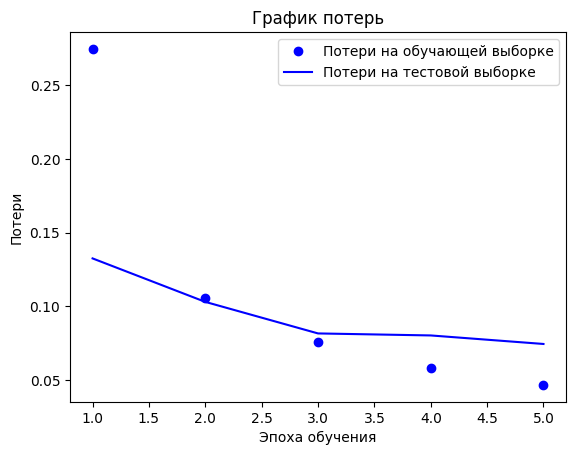

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

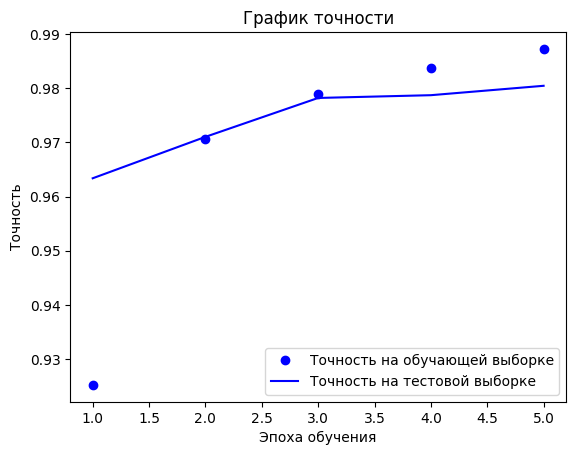

In [ ]:

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()